In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data, wb
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix
import datetime
%matplotlib inline

We will use pandas_datareader to read the last 5 years data for the S&P 500 (S&P), NYSE, Dow Jones Industrial Average (DJIA), Nikkei 225 (Nikkei), Hang Seng, FTSE 100 (FTSE), DAX, All Ordinaries (AORD) indices.

In [41]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2016,1,1)

In [42]:
SP500 = data.DataReader (name="^GSPC", data_source='yahoo', start=start, end=end)
NYSE = data.DataReader (name="^NYA", data_source='yahoo', start=start, end=end)
DAX = data.DataReader (name="^GDAXI", data_source='yahoo', start=start, end=end)
AORD = data.DataReader (name="^AORD", data_source='yahoo', start=start, end=end)
N225 = data.DataReader (name="^N225", data_source='yahoo', start=start, end=end)
HSI = data.DataReader (name="^HSI", data_source='yahoo', start=start, end=end)
FTSE = data.DataReader (name="^FTSE", data_source='yahoo', start=start, end=end)
DJI = data.DataReader (name="^DJI", data_source='yahoo', start=start, end=end)

Create a new dataframe to store the closing prices. Forward fill if there is gap existing.

In [43]:
closing_data = pd.DataFrame()
closing_data['SP500_close'] = SP500['Close']
closing_data['NYSE_close'] = NYSE['Close']
closing_data['DAX_close'] = DAX['Close']
closing_data['AORD_close'] = AORD['Close']
closing_data['N225_close'] = N225['Close']
closing_data['HSI_close'] = HSI['Close']
closing_data['FTSE_close'] = FTSE['Close']
closing_data['DJI_close'] = DJI['Close']

# forward fill NaN data
closing_data.fillna(method='ffill', inplace=True)
closing_data.describe()

,SP500_close,NYSE_close,DAX_close,AORD_close,N225_close,HSI_close,FTSE_close,DJI_close
count,1258.000000,1258.000000,1258.000000,1257.000000,1257.000000,1258.000000,1258.000000,1258.000000
mean,1657.088005,9328.550176,8453.690888,4977.202704,13361.877885,22401.180301,6234.751111,14862.448399
std,314.063224,1287.443497,1740.893594,504.185879,3925.553789,2061.144123,493.347817,2220.012223
min,1099.229980,6571.450195,5072.330078,3927.600098,8160.009766,16250.269531,4944.399902,10655.299805
25%,1352.502472,8164.622559,7086.185059,4500.500000,9492.209961,21193.255371,5852.900025,12764.274658
50%,1650.489990,9424.135254,8261.515137,5068.799805,13869.820312,22607.905274,6336.250000,15113.880371
75%,1972.627502,10570.832276,9715.957519,5384.600098,15912.059570,23519.409668,6671.224976,16941.639648
max,2130.820068,11239.660156,12374.730469,5954.799805,20868.029297,28442.750000,7104.000000,18312.390625


In [45]:
# Scale the value of each day by dividing with the max value of corresponding index. Add that column into the dataframe

closing_data['SP500_close_scaled'] = closing_data['SP500_close'] / max(closing_data['SP500_close'])
closing_data['NYSE_close_scaled'] = closing_data['NYSE_close'] / max(closing_data['NYSE_close'])
closing_data['DAX_close_scaled'] = closing_data['DAX_close'] / max(closing_data['DAX_close'])
closing_data['AORD_close_scaled'] = closing_data['AORD_close'] / max(closing_data['AORD_close'])
closing_data['N225_close_scaled'] = closing_data['N225_close'] / max(closing_data['N225_close'])
closing_data['HSI_close_scaled'] = closing_data['HSI_close'] / max(closing_data['HSI_close'])
closing_data['FTSE_close_scaled'] = closing_data['FTSE_close'] / max(closing_data['FTSE_close'])
closing_data['DJI_close_scaled'] = closing_data['DJI_close'] / max(closing_data['DJI_close'])

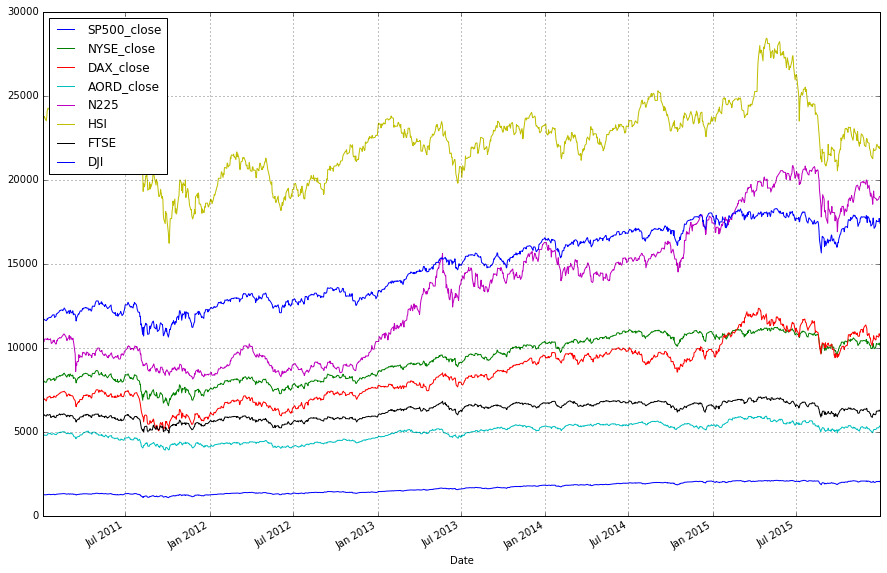

In [36]:
_ = pd.concat([closing_data['SP500_close'], 
           closing_data['NYSE_close'], 
           closing_data['DAX_close'], 
           closing_data['AORD_close'], 
           closing_data['N225_close'], 
           closing_data['HSI_close'],
           closing_data['FTSE_close'],
           closing_data['DJI_close']], axis=1).plot(grid=True,figsize=(15,10))

In [ ]:
_ = pd.concat([closing_data['SP500_close_scaled'], 
           closing_data['NYSE_close_scaled'], 
           closing_data['DAX_close_scaled'], 
           closing_data['AORD_close_scaled'], 
           closing_data['N225_close_scaled'], 
           closing_data['HSI_close_scaled'],
           closing_data['FTSE_close_scaled'],
           closing_data['DJI_close_scaled']], axis=1).plot(grid=True,figsize=(15,10))